In [1]:
import pandas as pd
import numpy
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Read CSV-File
transactions = pd.read_csv('Exercise 1 - Transaction Classification - Data Set.csv',
                            sep = ';')

In [3]:
# Deleting unimportant features and splitting Set into Input-data and Output-data
X = transactions.drop(['Unnamed: 0','label', 'Auftragskonto', 
                    'Buchungstag','Valutadatum', 'Beguenstigter/Zahlungspflichtiger',
                    'Waehrung','Kontonummer', 'Betrag'], axis = 1)
y = transactions['label']

In [4]:
# Locate missing values in the given data
X.isnull().sum().head()

Buchungstext        0
Verwendungszweck    0
BLZ                 1
dtype: int64

In [5]:
# Clean missing values with empty String
X['BLZ'] = X['BLZ'].fillna(' ')

In [6]:
# Train, Test, Split - Allocation: 75% Training data, 25% Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                        random_state = 42)

In [7]:
# Creation CountVectorizer object
vectorizer1 = CountVectorizer(min_df = 2)     # Reducing the number of dimensions
vectorizer2 = CountVectorizer(min_df = 1) 
vectorizer3 = CountVectorizer(min_df = 1) 

# Fit BoW for training data
X_train1 = vectorizer1.fit(X_train['Verwendungszweck'])
X_train2 = vectorizer2.fit(X_train['Buchungstext'])
X_train3 = vectorizer3.fit(X_train['BLZ'])

# Transform training and test data
X_train1 = vectorizer1.transform(X_train['Verwendungszweck']).toarray()
X_train2 = vectorizer2.transform(X_train['Buchungstext']).toarray()
X_train3 = vectorizer3.transform(X_train['BLZ']).toarray()

X_test1 = vectorizer1.transform(X_test['Verwendungszweck']).toarray()
X_test2 = vectorizer2.transform(X_test['Buchungstext']).toarray()
X_test3 = vectorizer3.transform(X_test['BLZ']).toarray()

In [8]:
# Merging all generated features
X_train = numpy.concatenate((X_train1, X_train2, X_train3), axis=1) 
print('Amount rows: ', X_train.shape[0], ' + amount columns: ', X_train.shape[1]) 
X_test = numpy.concatenate((X_test1, X_test2, X_test3), axis=1) 
print('Amount rows: ', X_test.shape[0], ' + amount columns: ', X_test.shape[1]) 

Amount rows:  156  + amount columns:  224
Amount rows:  53  + amount columns:  224


Null accuracy:  leisure    0.301887
Name: label, dtype: float64
Accuracy score:  0.9622641509433962
F1 score Values:  [1.         1.         0.94117647 0.92307692 1.         0.95652174]


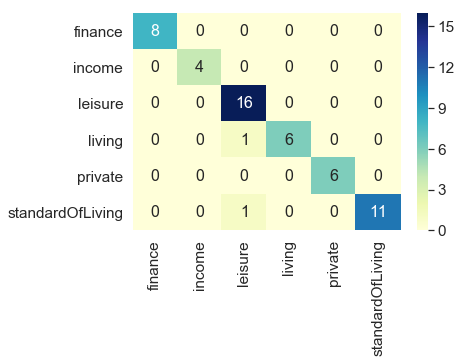

In [9]:
# Gaussian Naive Bayes Classifier
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)

y_pred = GausNB.predict(X_test)
print('Null accuracy: ', y_test.value_counts().head(1) / len(y_test))
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score Values: ', f1_score(y_test, y_pred, average=None))

# Plot - Confusion matrix - visualization
plot_names = numpy.unique(y_test)
MultiPlot = pd.DataFrame(confusion_matrix(y_test, y_pred), index = plot_names,
                  columns = plot_names)
sn.set(font_scale=1.4)              
sn.heatmap(MultiPlot, cmap="YlGnBu", annot=True, annot_kws={"size": 16})   


In [10]:
misclassified_samples = X_test[y_test != y_pred]
print(misclassified_samples.shape)

f1 = vectorizer1.get_feature_names()
f2 = vectorizer2.get_feature_names()
f3 = vectorizer3.get_feature_names()
X_fsum = numpy.concatenate((f1, f2, f3))

# Print BoW of misclassified testsamples for error detection
for x in range(0, misclassified_samples.shape[0]):
    print ('------')
    for y in range(0, misclassified_samples.shape[1]):
        if misclassified_samples[x,y] != 0:
            print(X_fsum[y])

(2, 224)
------
03
12
17
30
einzugsermächtigung
lastschrift
cobadeff
------
03
20
21
23
einzugsermächtigung
lastschrift
weladedd
